In [110]:
import osmnx as ox
from shapely.geometry import box
import matplotlib.pyplot as plt
import geopandas
import pandas as pd

In [76]:
place_name = "Hackney, UK"
hackney = ox.geocode_to_gdf(place_name)
polygon = box(-0.1, 51.57, -0.08, 51.56)
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon])

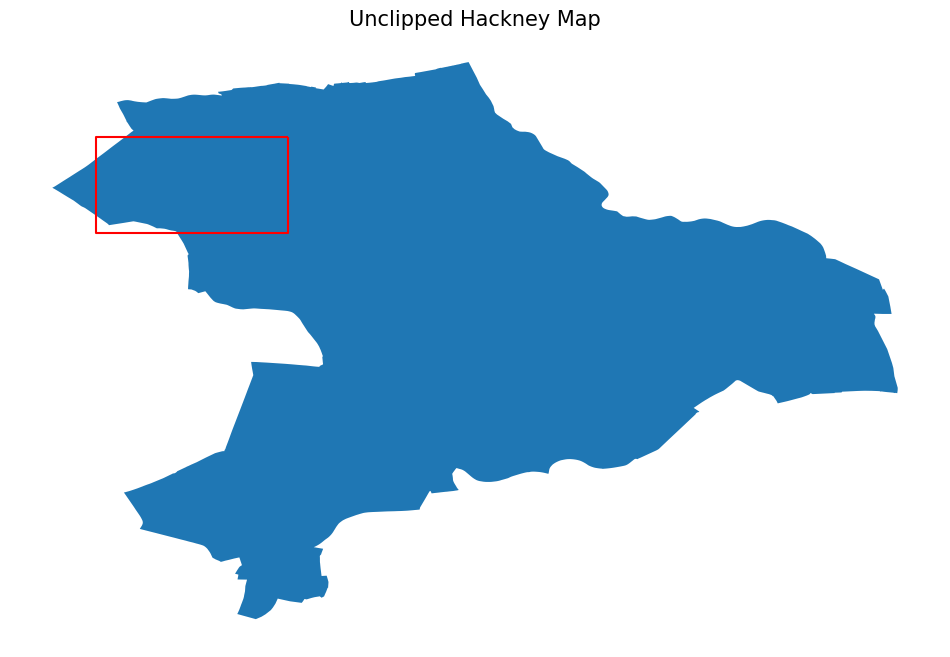

In [77]:
fig, ax1 = plt.subplots(1, figsize=(12, 8))
hackney.plot(ax=ax1)
poly_gdf.boundary.plot(ax=ax1, color="red")
ax1.set_title("Unclipped Hackney Map", fontsize=15)
ax1.set_axis_off()
plt.show()

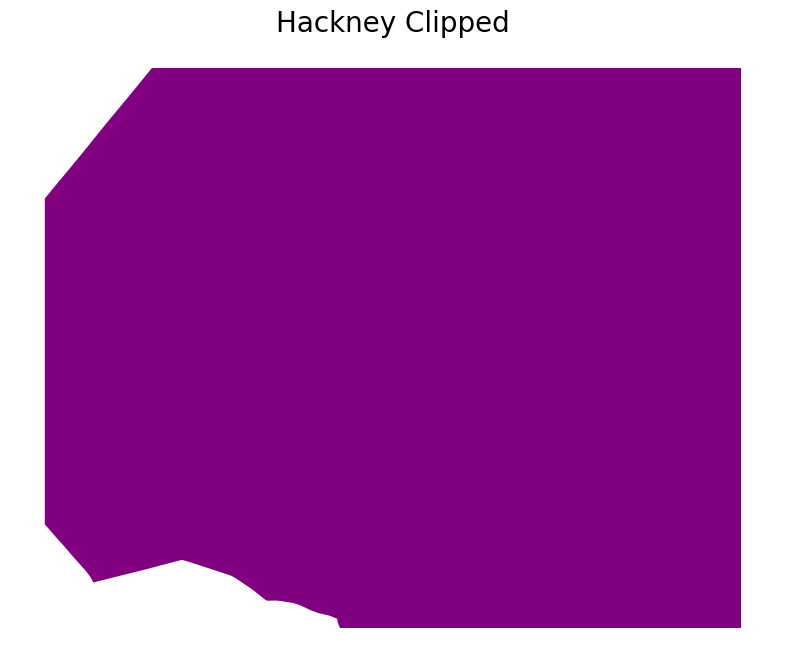

In [78]:
hackney_clipped = hackney.clip(polygon)
fig, ax = plt.subplots(figsize=(12, 8))
hackney_clipped.plot(ax=ax, color="purple")
ax.set_title("Hackney Clipped", fontsize=20)
ax.set_axis_off()
plt.show()

<Axes: >

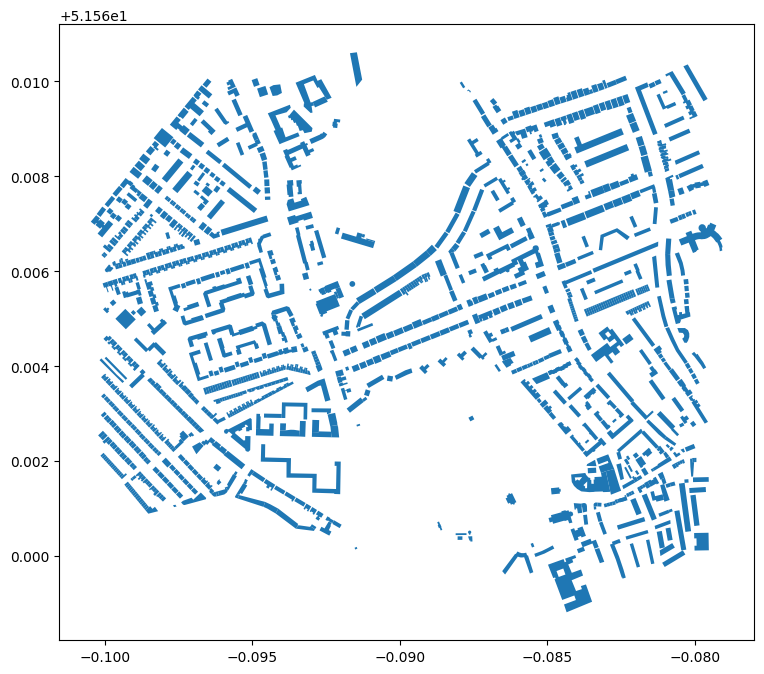

In [93]:
tags = {"building": True}
buildings = ox.features_from_polygon(hackney_clipped['geometry'].iloc[0], tags)
fig, ax1 = plt.subplots(1, figsize=(12, 8))
buildings.plot(ax=ax1)

<Axes: >

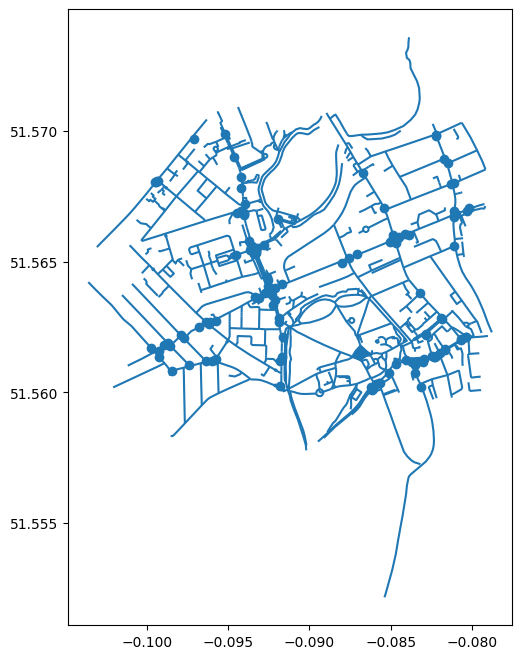

In [94]:
tags = {"highway": True}
buildings = ox.features_from_polygon(hackney_clipped['geometry'].iloc[0], tags)
fig, ax1 = plt.subplots(1, figsize=(12, 8))
buildings.plot(ax=ax1)

<Axes: >

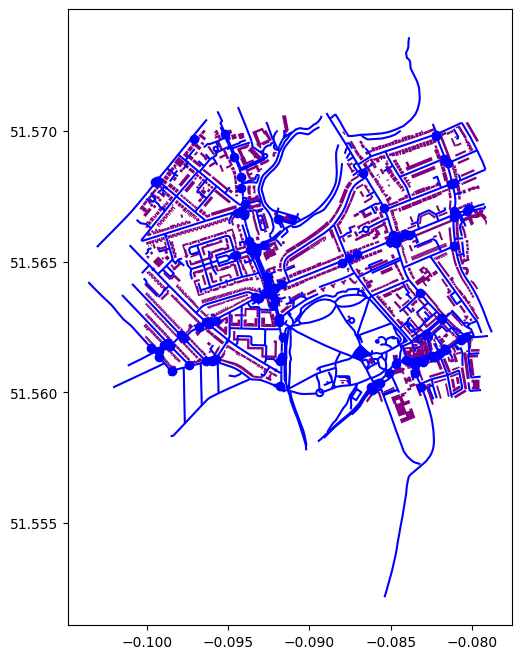

In [97]:
fig, ax1 = plt.subplots(1, figsize=(12, 8))
building_tags = {"building": True}
road_tags = {"highway": True}
buildings = ox.features_from_polygon(hackney_clipped['geometry'].iloc[0], building_tags)
buildings.plot(ax=ax1, color="purple")
road = ox.features_from_polygon(hackney_clipped['geometry'].iloc[0], road_tags)
road.plot(ax=ax1, color="blue")

In [107]:
shapely_polyon = buildings['geometry'].iloc[0]
xx, yy = shapely_polyon.exterior.coords.xy

In [118]:
for index, row in buildings.iterrows():
  xx, yy = row['geometry'].exterior.coords.xy
  for polygon_index in range(len(xx)):
      x_value = xx[polygon_index]
      y_value = yy[polygon_index]
      print("({},{})".format(x_value, y_value))
      break
  break

(-0.0829675,51.5644915)
